# 'Natural Experiments in Management Research'

__Author__: masked

__Synopsis__: this Jupyter notebook reproduces the set of exhibits
              reported in the 2023 JoM review issue proposal
              # __!! report number !!__

__Updated__: June 24, 2021

## Load functions

In [56]:
# utilities
from pprint import pprint
# standard stuff
import pandas as pd
# a user defined lollipop chart
from companionCode.charts import lollipop
# to parse BibTeX stuff
from companionCode.handleBibs import df_from_bib

## Sampling

In [57]:
# TODO: export separate BibTeX files from the individual folders

## Sample descriptives

In [63]:
# load data
in_f = "manuscript/references/sampled_studies.bib"
df = df_from_bib(in_f)

### Distribution of studies over time

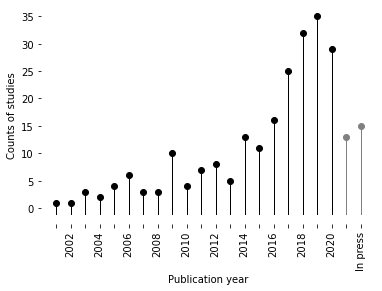

In [64]:
lollipop(
    df_=df, x_label="Publication year", y_label="Counts of studies", grouping_var="year"
)

In [65]:
df.groupby('year').size()

year
2001     1
2002     1
2003     3
2004     2
2005     4
2006     6
2007     3
2008     3
2009    10
2010     4
2011     7
2012     8
2013     5
2014    13
2015    11
2016    16
2017    25
2018    32
2019    35
2020    29
2021    13
2022    15
dtype: int64

### Distribution of studies over time and journals

In [66]:
tw = pd.crosstab(df['journal'], df['year'])
pprint(tw)

year                                   2001  2002  2003  2004  2005  2006  \
journal                                                                     
Academy of Management Journal             0     0     0     0     1     0   
Administrative Science Quarterly          0     0     0     0     0     0   
Entrepreneurship: Theory and Practice     0     0     0     0     0     0   
Journal of Business Ethics                0     0     0     1     0     0   
Journal of Business Venturing             0     0     0     0     0     0   
Journal of Management                     0     0     0     0     0     0   
Journal of Management Studies             0     0     0     0     1     0   
Leadership Quarterly                      0     0     0     0     1     0   
Management Science                        1     1     1     0     0     2   
Organization Science                      0     0     0     1     0     3   
Research Policy                           0     0     0     0     0     0   

In [67]:
out_f = 'manuscript/exhibits/articles_over_time_and_journals.txt'
tw.to_latex(out_f)

## Topic modeling of abstracts

## Semantic analysis